<a href="https://colab.research.google.com/drive/11YUPUzfrXybXFx-az9fKZFSu0UYE45-H#scrollTo=raU7i9fQpFjI" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>


## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 16, 10

## Data

In [2]:
# data address for downloading
download_addr = "https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1318&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=RSXFSN&scale=left&cosd=1992-01-01&coed=2023-03-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2023-05-05&revision_date=2023-05-05&nd=1992-01-01"

In [3]:
# Store data in DataFrame
df = pd.read_csv(download_addr)

In [4]:
# keep real GDP only
keep_columns = ['RSXFSN']
df = df[keep_columns]
# rescale
df = df/10000

## Data Preprocessing

In [5]:
# split train & test data at rate 0.8
n_train = int(len(df) * 0.8)
n_test = len(df) - n_train
train, test = df.iloc[0:n_train], df.iloc[n_train:len(df)]
# print size of train and test
print(len(train), len(test))

300 75


In [6]:
# group data to a new dimension, which represents the timestamp
def get_timeseries(x, n_steps=1):
    x_ts, y_ts = [], []
    for ii in range(len(x) - n_steps):
        v = x.iloc[ii:(ii + n_steps)].values
        x_ts.append(v)
        w = x.iloc[ii + n_steps].values
        y_ts.append(w)
    return np.array(x_ts), np.array(y_ts)

In [7]:
n_steps = 16
n_features = 1

# convert to a time series dimension: [samples, n_steps, n_features]

x_train, y_train = get_timeseries(train, n_steps)
x_test, y_test = get_timeseries(test,n_steps)

print(x_train.shape, y_train.shape)

(284, 16, 1) (284, 1)


## Baseline MLP Modeling

In [8]:
# define model
model = Sequential()
model.add(Dense(50, activation='relu', input_dim=n_steps))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=Adam(0.001))

## Training

In [9]:
# fit model
history = model.fit(x_train, y_train,epochs=500,batch_size=32,validation_split=0.1,verbose=1,shuffle=False)

Epoch 1/500
8/8 [==============================] - 2s 25ms/step - loss: 410.2262 - val_loss: 387.5510
Epoch 2/500
8/8 [==============================] - 0s 7ms/step - loss: 70.2108 - val_loss: 23.3192
Epoch 3/500
8/8 [==============================] - 0s 6ms/step - loss: 10.2007 - val_loss: 35.2904
Epoch 4/500
8/8 [==============================] - 0s 6ms/step - loss: 24.8963 - val_loss: 43.8245
Epoch 5/500
8/8 [==============================] - 0s 6ms/step - loss: 12.7229 - val_loss: 12.3543
Epoch 6/500
8/8 [==============================] - 0s 6ms/step - loss: 4.7997 - val_loss: 8.7281
Epoch 7/500
8/8 [==============================] - 0s 7ms/step - loss: 6.1788 - val_loss: 10.2517
Epoch 8/500
8/8 [==============================] - 0s 7ms/step - loss: 5.4341 - val_loss: 7.6957
Epoch 9/500
8/8 [==============================] - 0s 6ms/step - loss: 4.7441 - val_loss: 7.7499
Epoch 10/500
8/8 [==============================] - 0s 7ms/step - loss: 4.7753 - val_loss: 7.7259
Epoch 11/500
8/

## Evaluation

In [10]:
# make prediction
y_pred = model.predict(x_test)

2/2 [==============================] - 0s 2ms/step


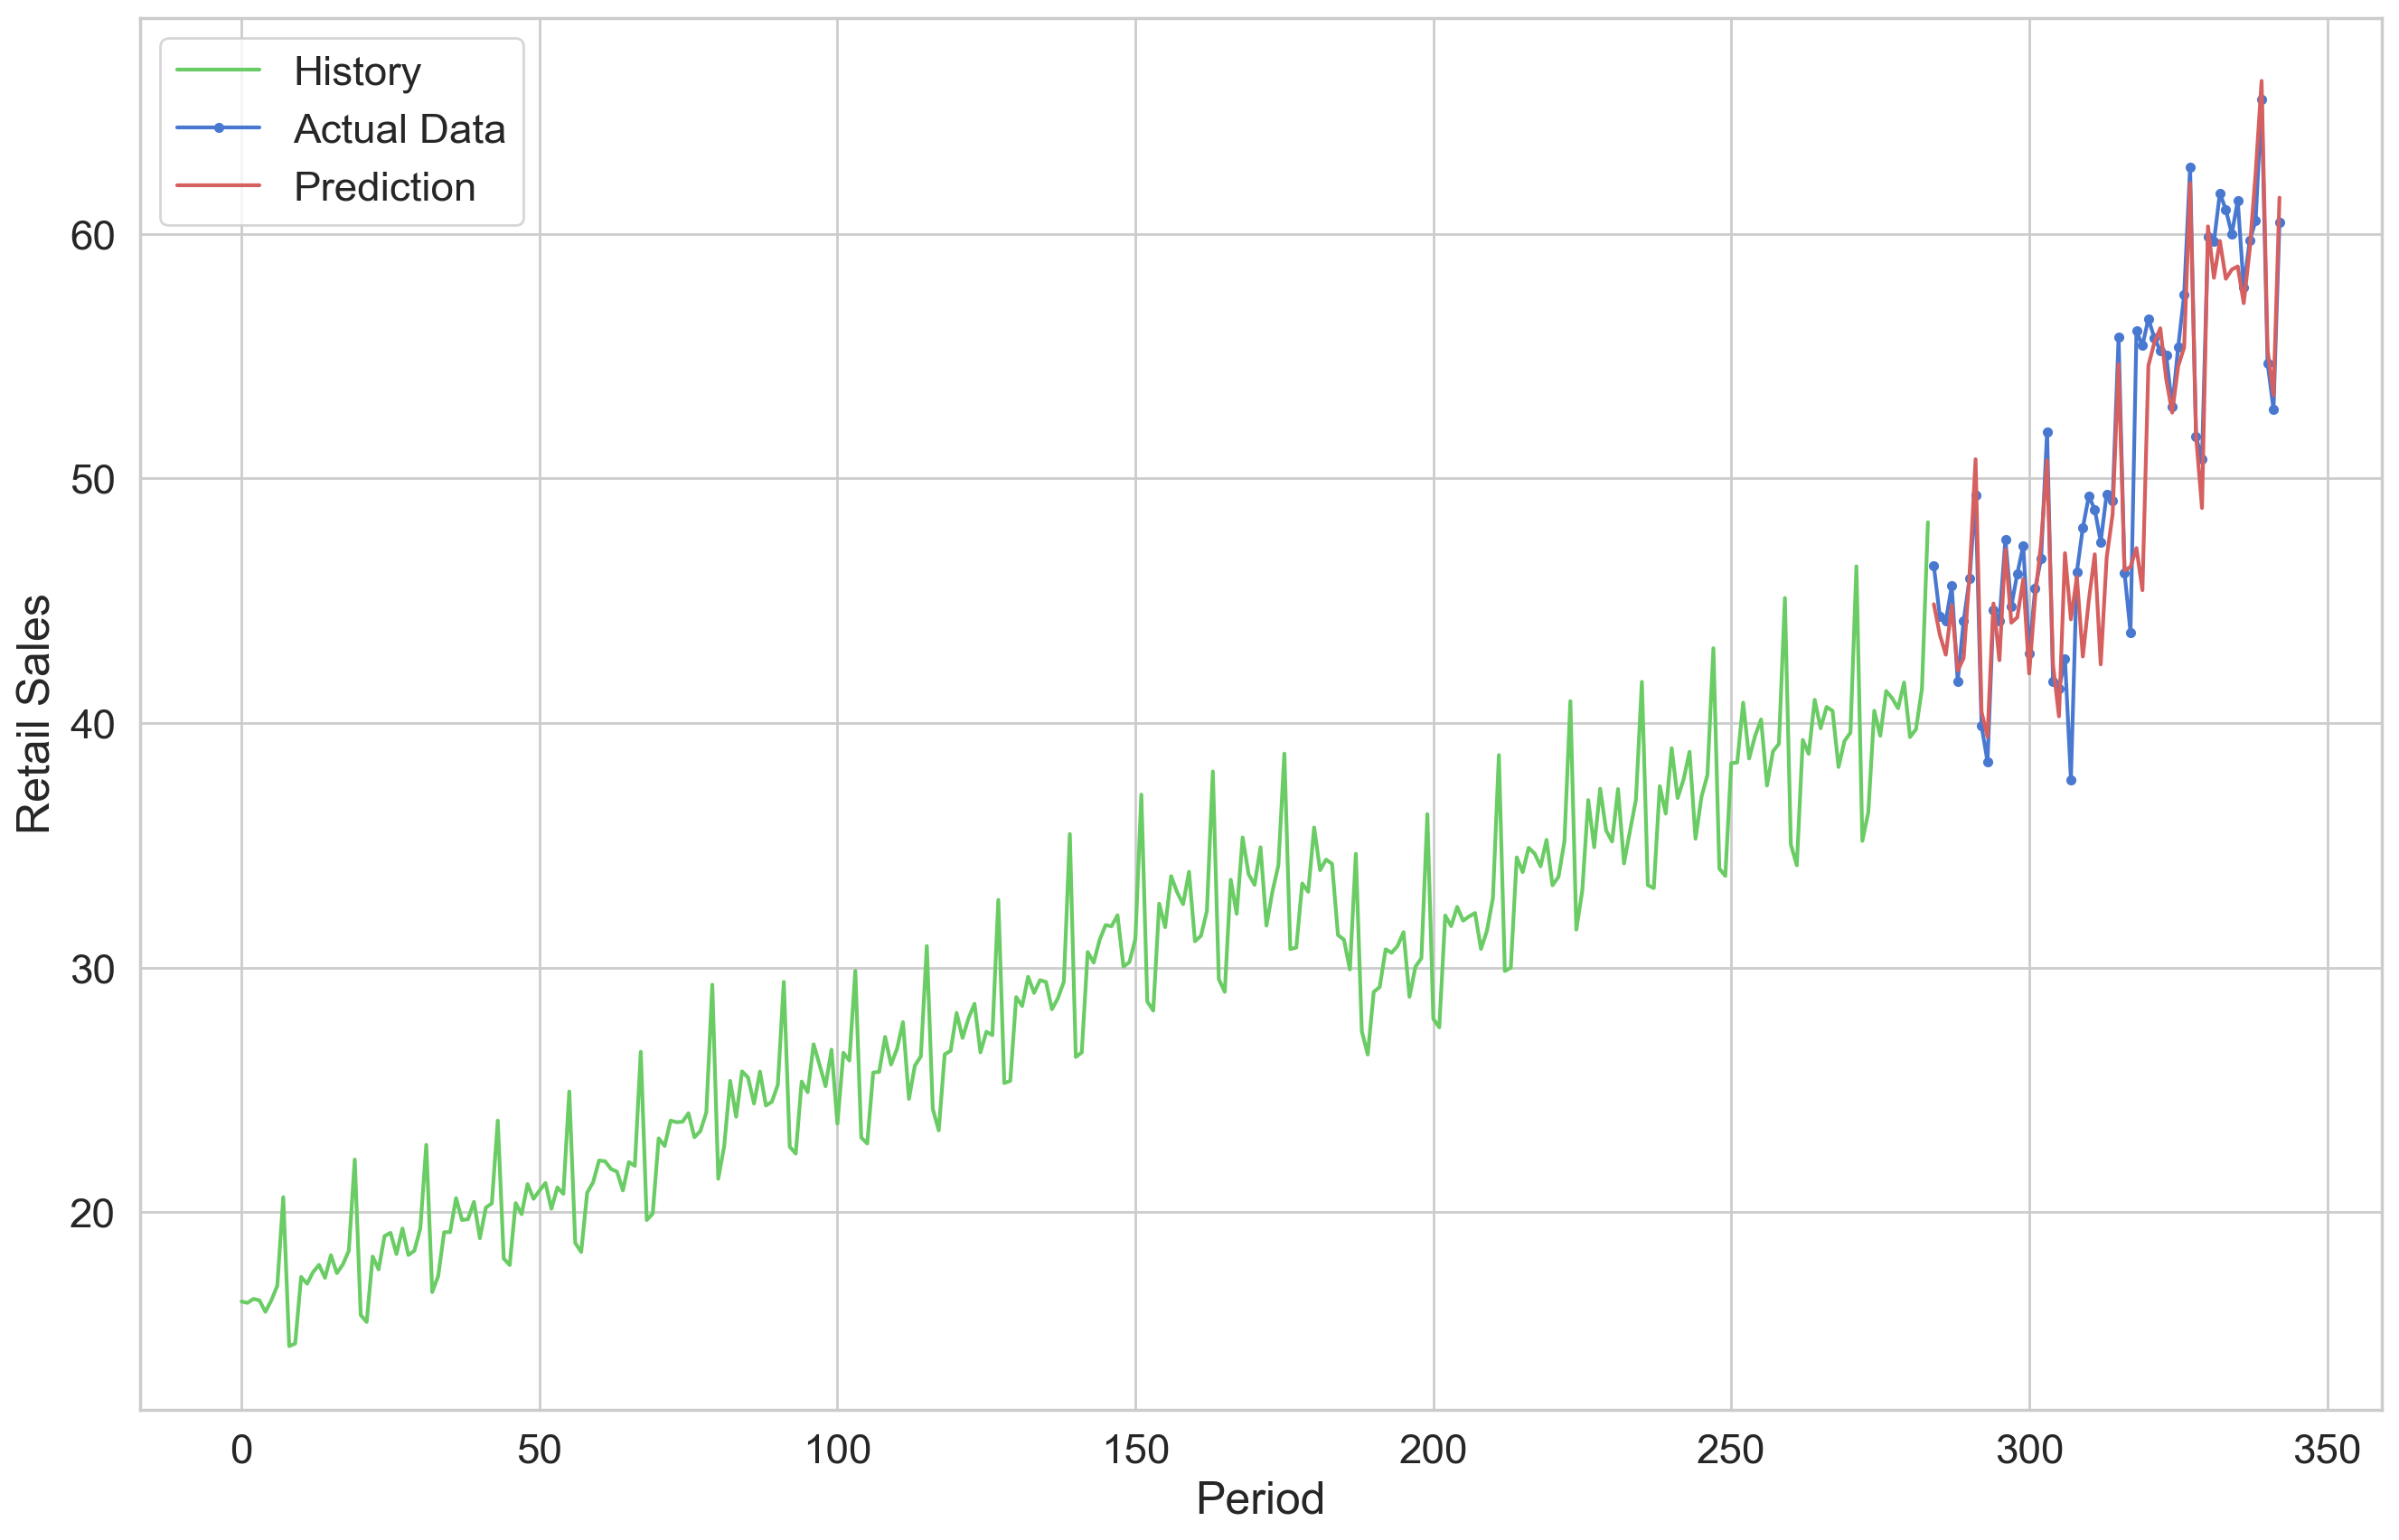

In [11]:
# plot matching graph including history
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="History")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="Actual Data")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="Prediction")
plt.ylabel('Retail Sales')
plt.xlabel('Period')
plt.legend()
plt.show();

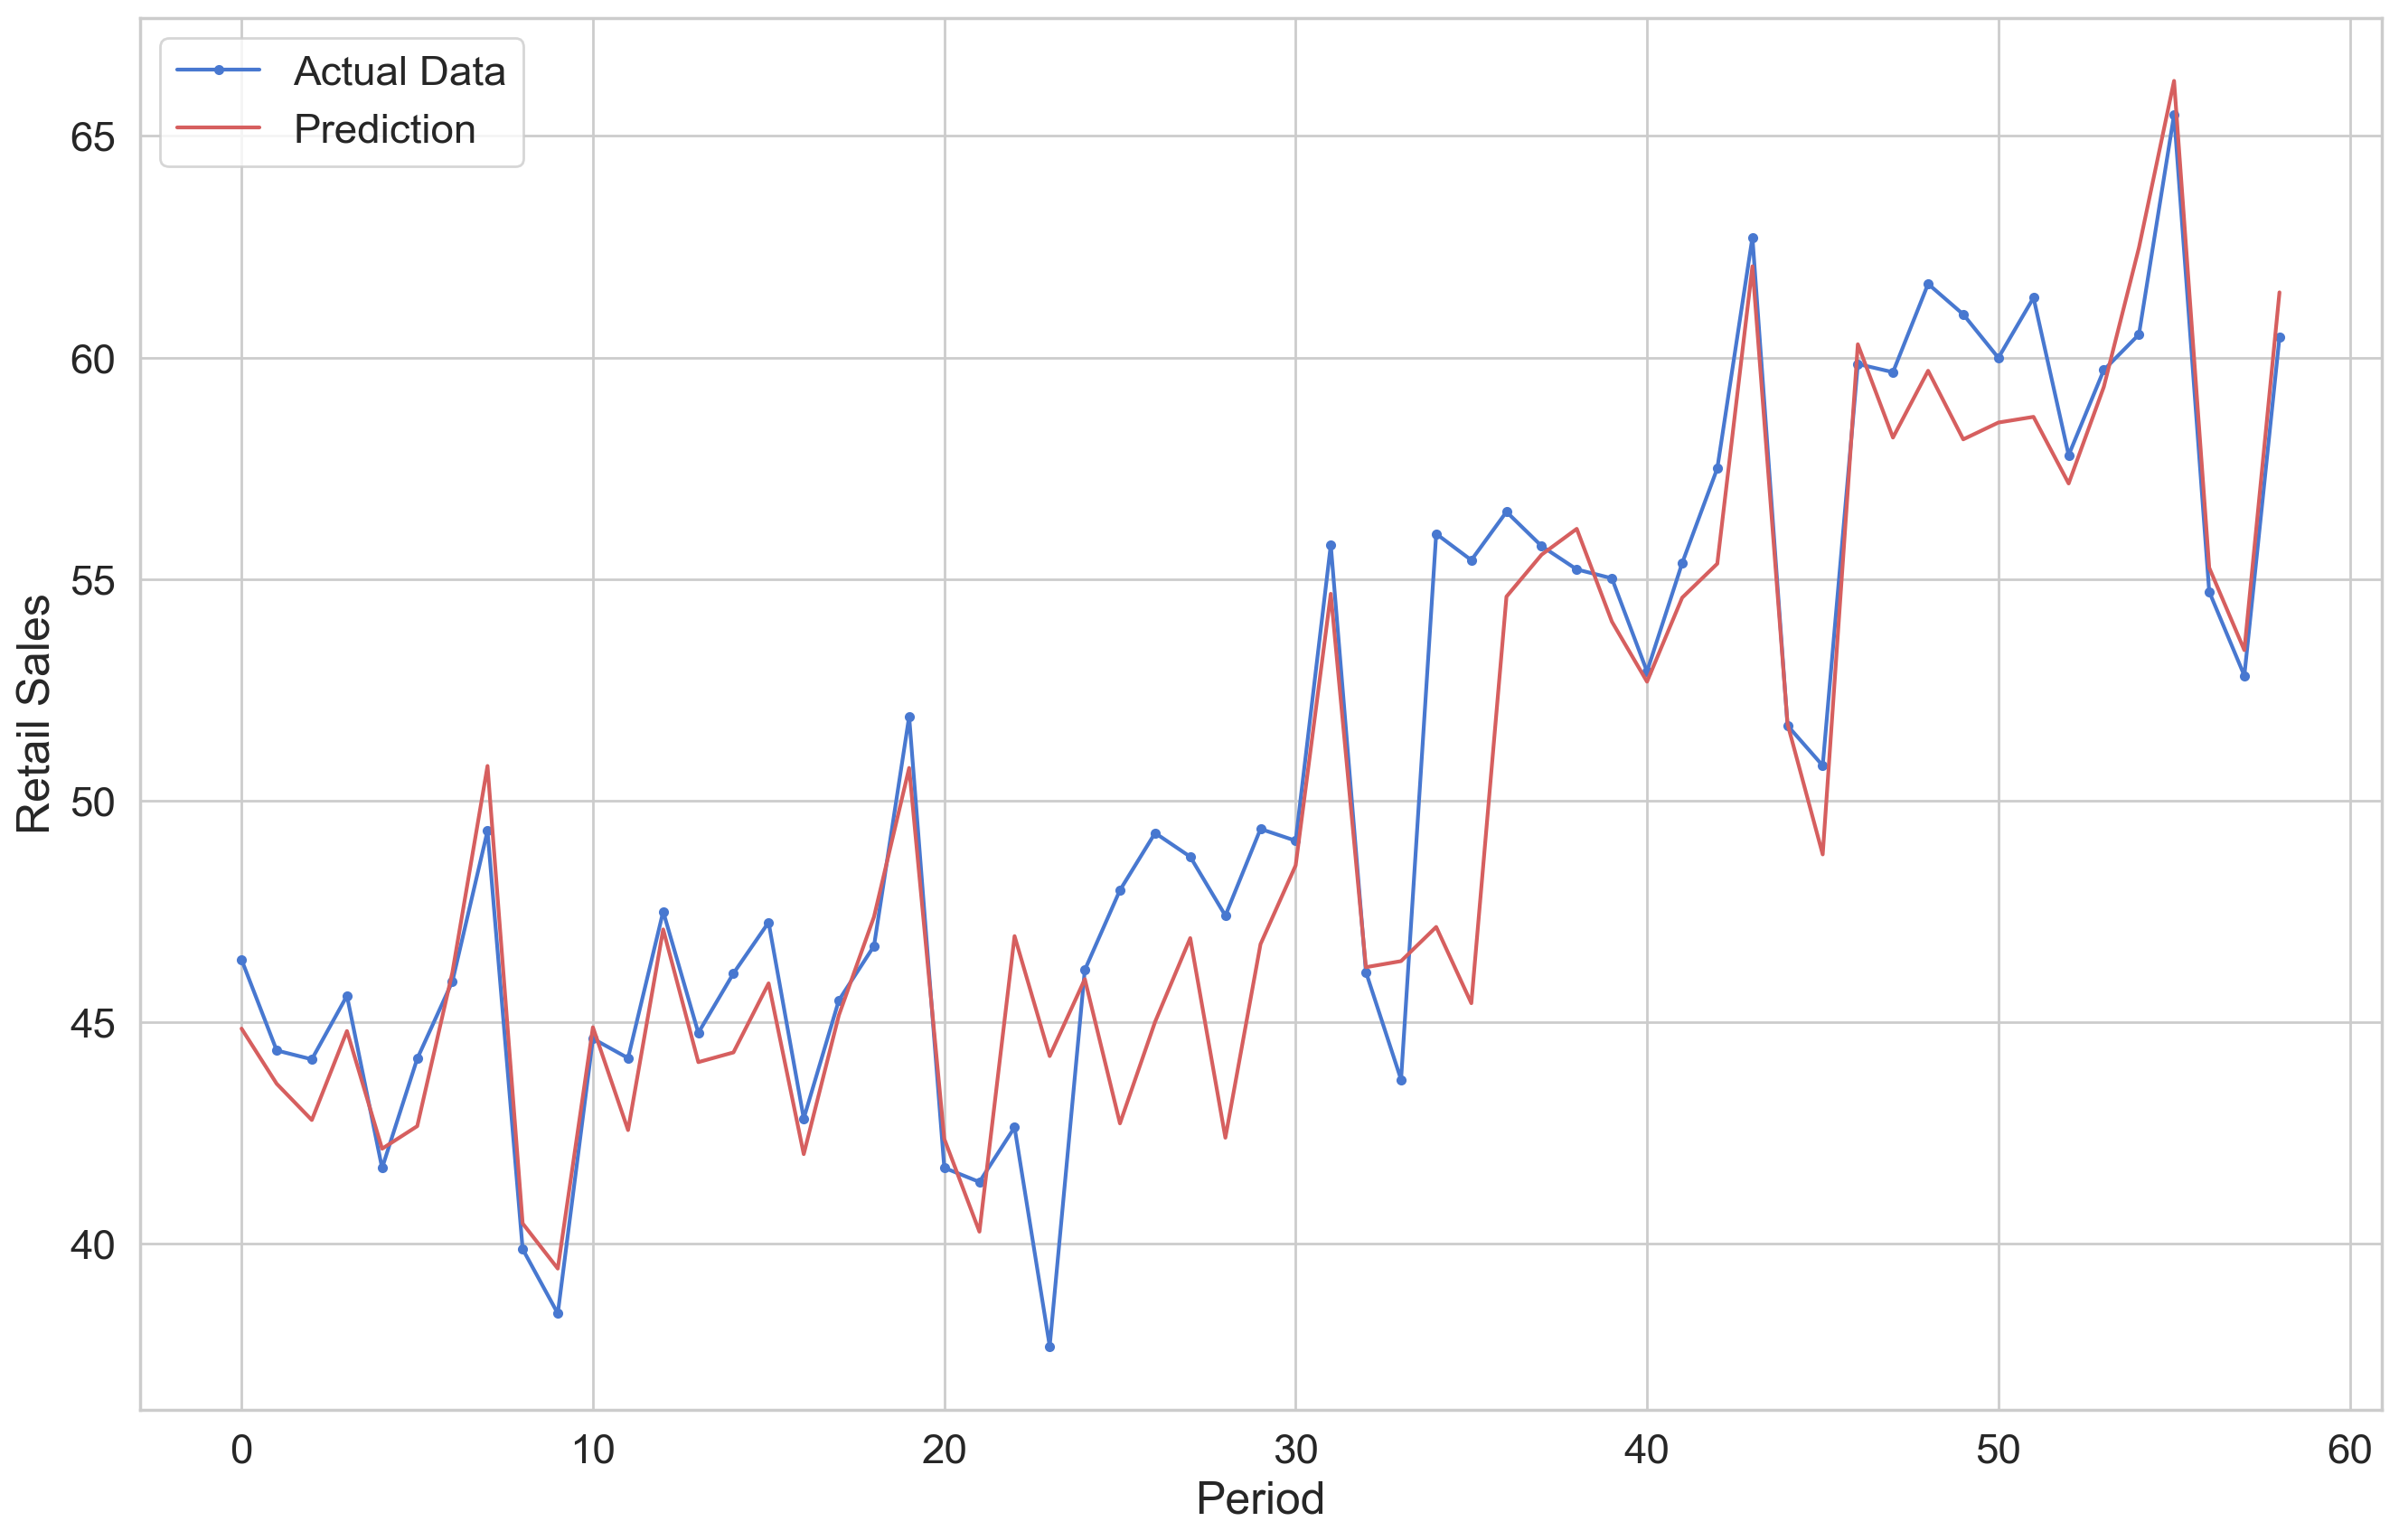

In [12]:
# # plot matching graph without history
plt.plot(y_test, marker='.', label="Actual Data")
plt.plot(y_pred, 'r', label="Prediction")
plt.ylabel('Retail Sales')
plt.xlabel('Period')
plt.legend()
plt.show();

# CNN Model

In [13]:
# one layer CNN model, using a one dimensional conv1d layer for convolution transformation. Keeping most hyperparameters be the same.
model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=(n_steps, 1)))
model.add(Flatten())
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=Adam(0.001))

In [14]:
# fit model
history = model.fit(x_train, y_train,epochs=500,batch_size=32,validation_split=0.1,verbose=1,shuffle=False)

Epoch 1/500
8/8 [==============================] - 4s 49ms/step - loss: 485.8172 - val_loss: 478.3804
Epoch 2/500
8/8 [==============================] - 0s 7ms/step - loss: 91.0647 - val_loss: 31.8071
Epoch 3/500
8/8 [==============================] - 0s 7ms/step - loss: 13.2732 - val_loss: 43.6942
Epoch 4/500
8/8 [==============================] - 0s 7ms/step - loss: 29.3872 - val_loss: 47.3417
Epoch 5/500
8/8 [==============================] - 0s 7ms/step - loss: 12.3888 - val_loss: 11.4077
Epoch 6/500
8/8 [==============================] - 0s 7ms/step - loss: 6.1312 - val_loss: 11.5340
Epoch 7/500
8/8 [==============================] - 0s 7ms/step - loss: 7.8983 - val_loss: 11.5387
Epoch 8/500
8/8 [==============================] - 0s 7ms/step - loss: 6.5681 - val_loss: 9.0076
Epoch 9/500
8/8 [==============================] - 0s 7ms/step - loss: 6.0948 - val_loss: 9.6124
Epoch 10/500
8/8 [==============================] - 0s 7ms/step - loss: 6.0516 - val_loss: 9.2862
Epoch 11/500
8

In [15]:
# make prediction
y_pred = model.predict(x_test)

2/2 [==============================] - 0s 62ms/step


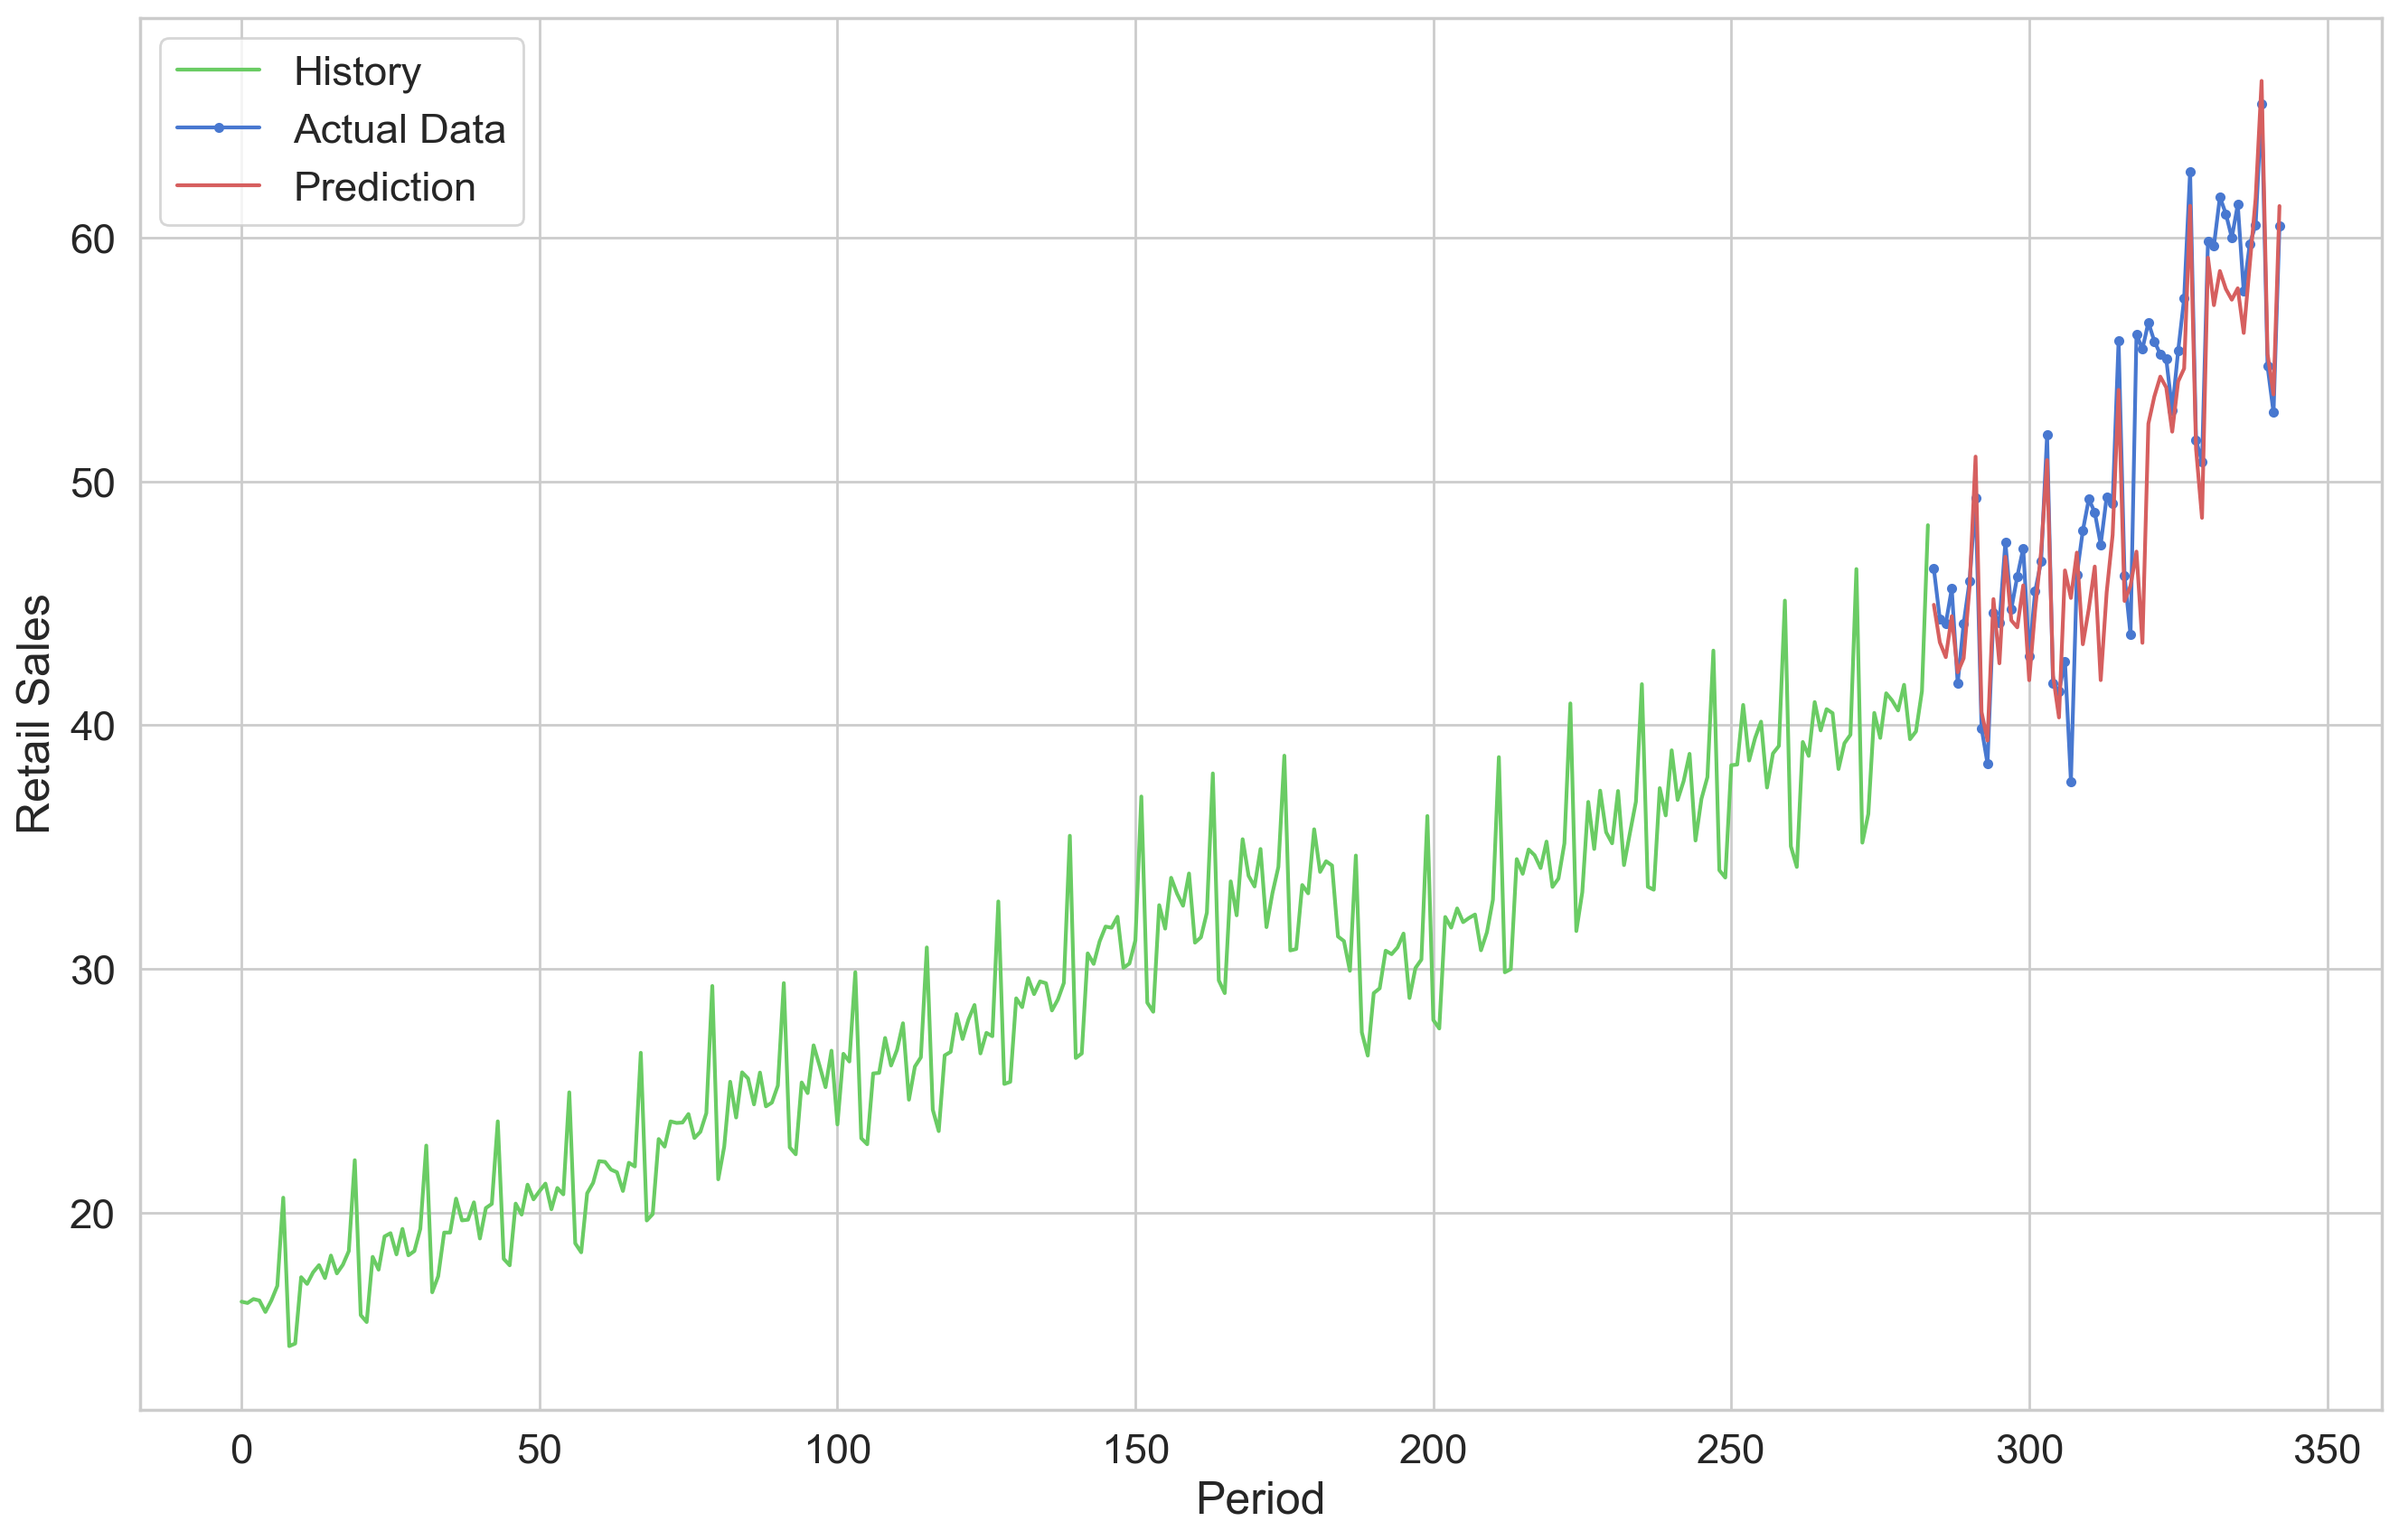

In [16]:
# plot matching graph including history
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="History")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="Actual Data")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="Prediction")
plt.ylabel('Retail Sales')
plt.xlabel('Period')
plt.legend()
plt.show()

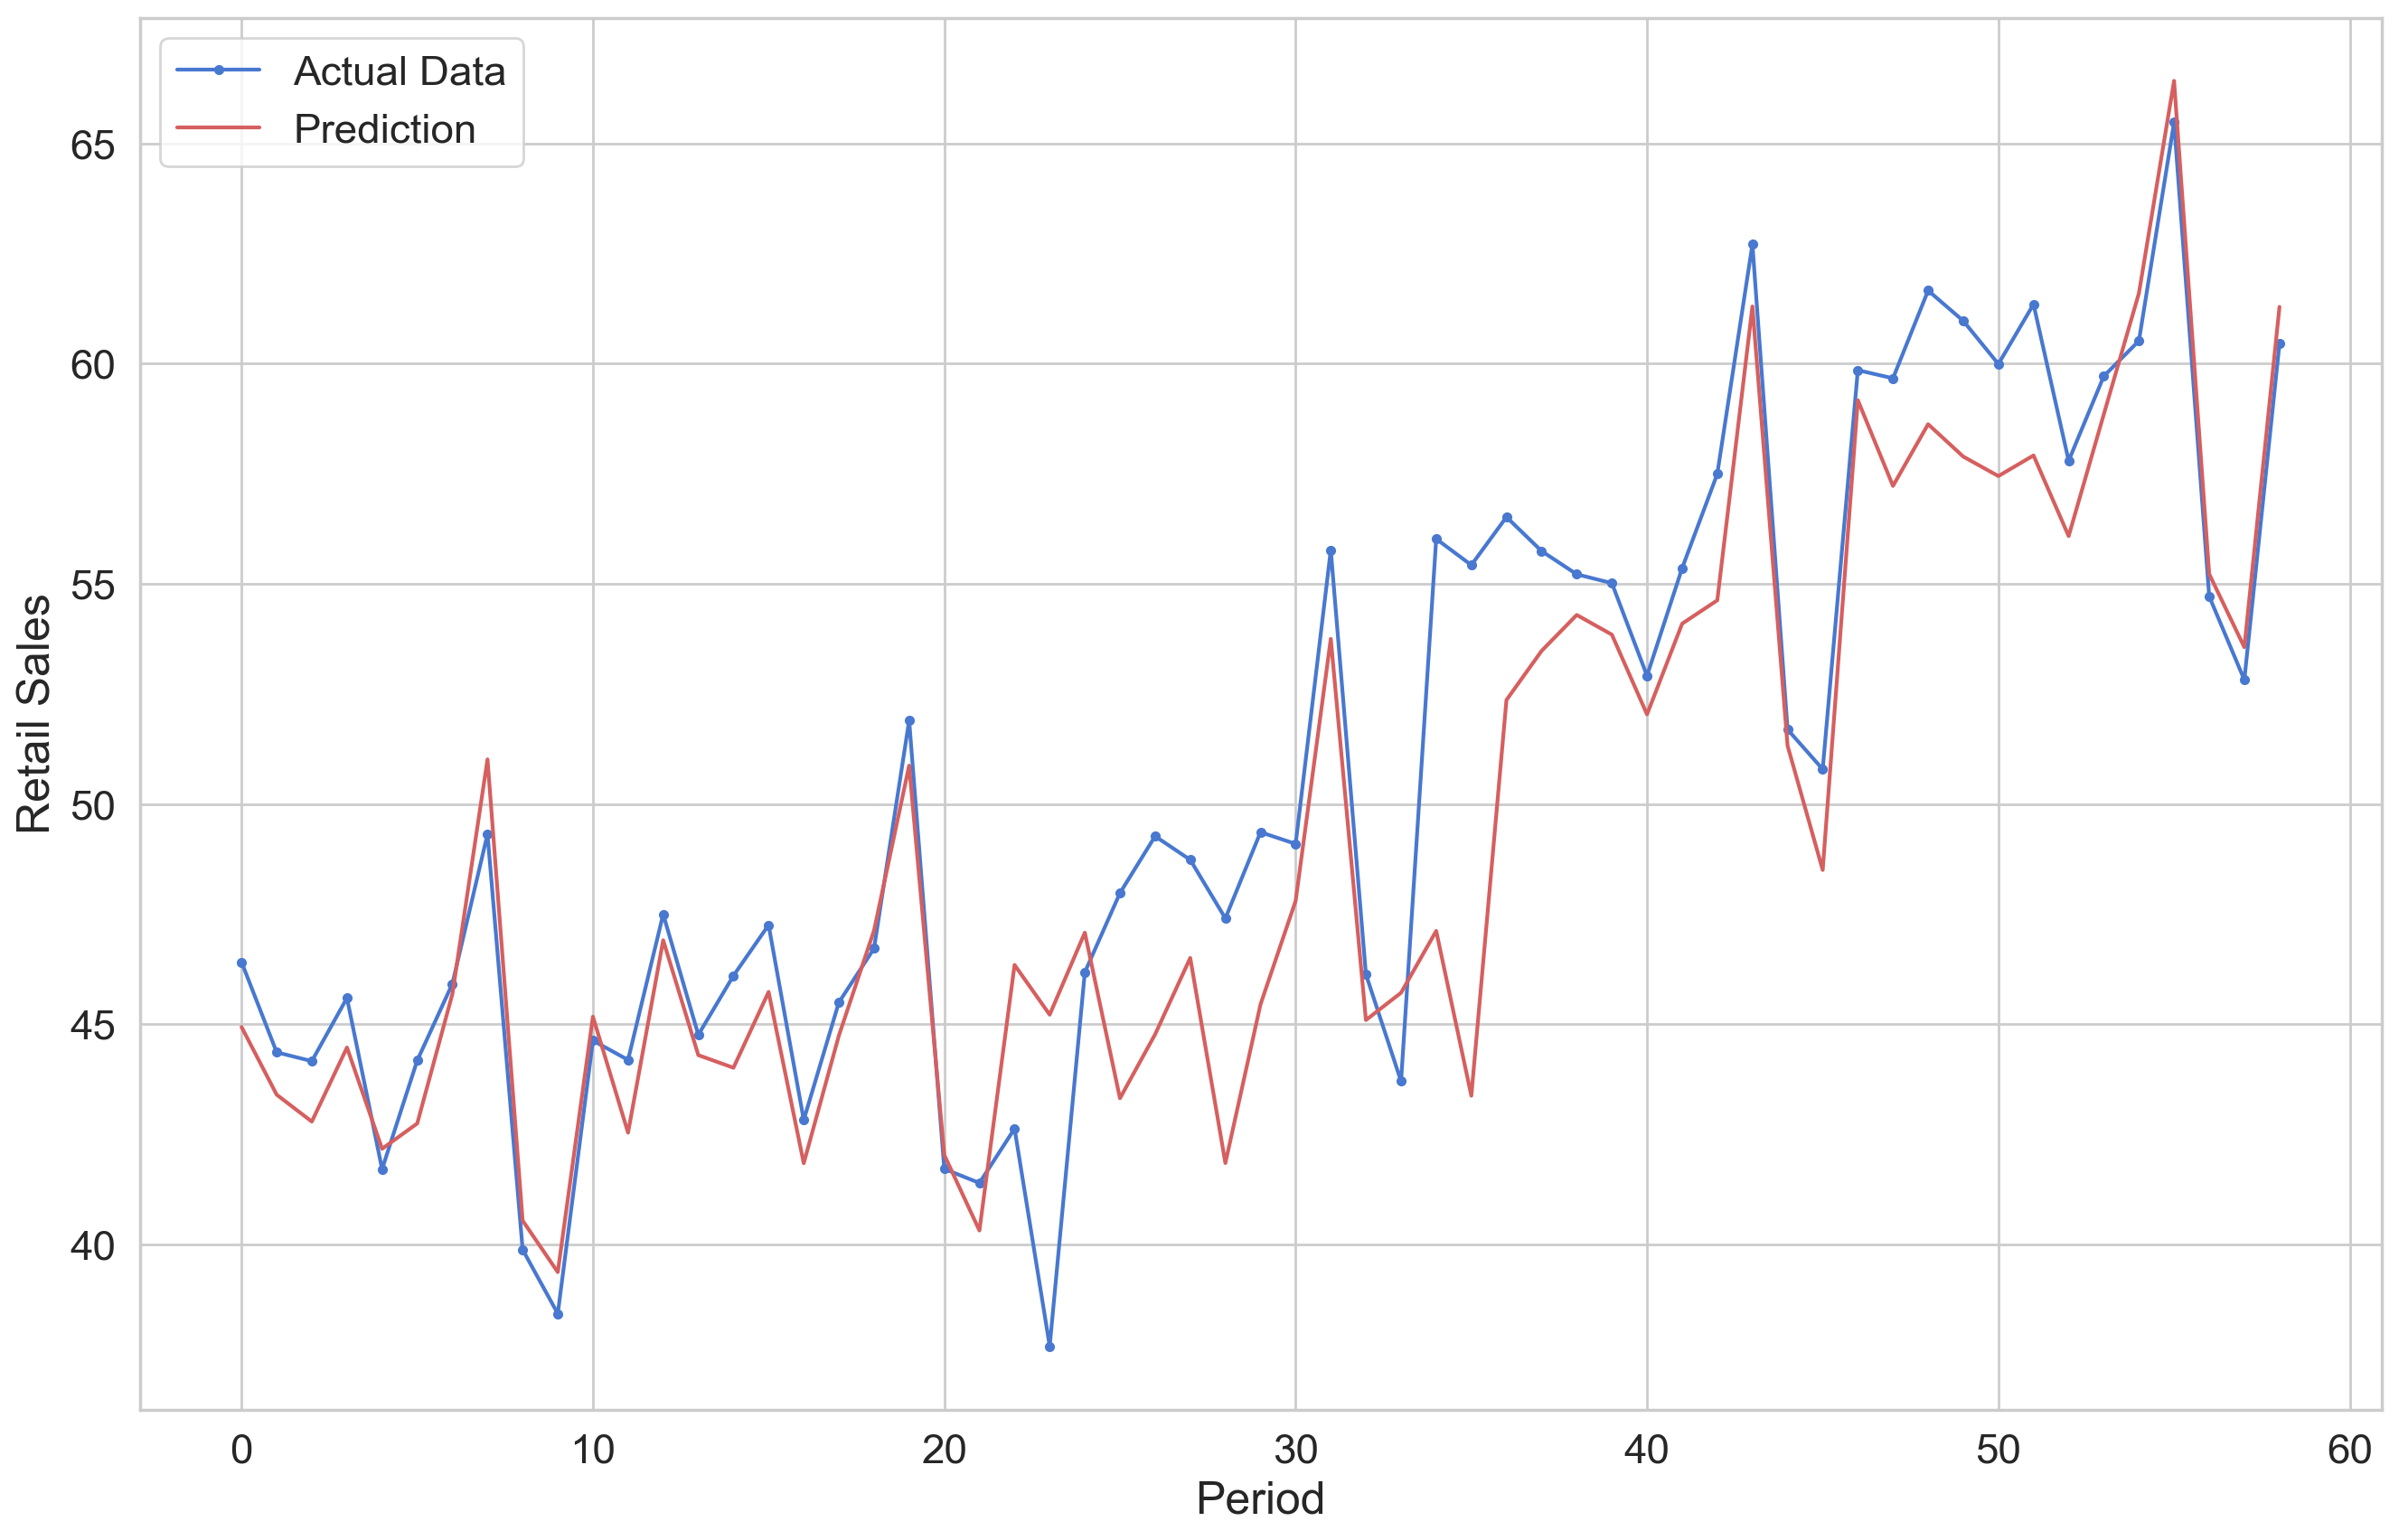

In [17]:
# plot matching graph without history
plt.plot(y_test, marker='.', label="Actual Data")
plt.plot(y_pred, 'r', label="Prediction")
plt.ylabel('Retail Sales')
plt.xlabel('Period')
plt.legend()
plt.show()

# Conclusion

With nearly the same hyperparamenters, one layer CNN model is slightly better than one layer NN model using the data, but not too much. The final validation loss of NN is 0.69, and of CNN is 0.52. By comparing training loss and validation loss, CNN model seems not to overfit, but NN model seems to overfit. The predictions made by both models shown on the graph are similar.